# Le problème à résoudre
On dispose d’une barre de longueur donnée que l’on peut revendre d’un seul tenant ou en morceaux.
L’objectif étant de maximiser le gain.

Par exemple : la barre est de longueur 8 et le tableau ci-dessous donne les prix en fonction de la longueur du morceau.

|Longueur du morceau |0 |1| 2 |3| 4| 5| 6| 7| 8
|--------------------|--|--|--|--|--|--|--|--|--|
|Prix du morceau | 0| 2| 3| 8| 10| 13| 15| 16 |21|



### Exercice 1
Donner une ou plusieurs solutions optimales :
*********************************************
- 8: 21, 7+1: 18, 6+2 :18 , 6+1+1: 19 , 5+3: 21 , 5+2+1: 18 5+1+1+1 :19 4+4:20 4+2+2: 16 , 4+2+1+1:17 

- 4+3+1: 20,  4+1+1+1+1:18 

Le maximum est 21 pour un  morceau de taille 8 ou 2 morceaux de taille 5 et 3 

-
*************************************************

# Trouver un algorithme - Approche naïve
+ Trouver toutes les découpes possibles.
+  Calculer le gain pour chacune d’entre elles.
+  Récupérer le plus grand.

Comment déterminer toutes les découpes possibles?

Représentons le cas d'une barre de longueur 5. Et construisons toutes les découpes possibles à l'aide d'un arbre:
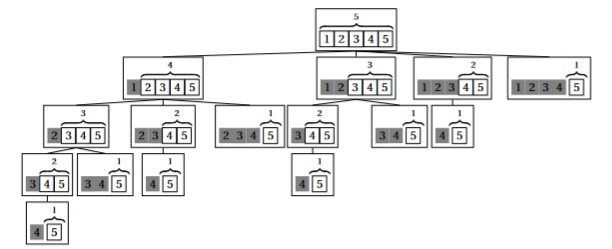

Pour une longueur de 5, il y a 16 possibilités.
Pour une barre de longueur n il y a $2^{n-1}$ possibilités.

##  Calcul du meilleur gain

A chaque niveau :

meilleur gain$=MAX\left\{\begin{array}{c}\text{Pour chaque découpe :}\\
\text{Prix de la partie découpée+le meileur gain sur le reste de la découpe}\\
\end{array}\right\}$

### L'algorithme

Données : 
+ taille est un entier
+ prix est une liste d’entiers

```python
fonction coupe(taille,prix):
    Si taille <= 0 alors
        renvoyer 0
    meilleur <-- prix[taille]
    decoupe  <-- 1
    Tant que decoupe <= taille faire
        meilleur <-- max(meilleur,prix[decoupe] + coupe(taille-decoupe,prix))
        decoupe  <-- decoupe + 1
    renvoyer meilleur
```

### Exercice 2
Écrire la fonction coupe et la tester sur l'exemple de départ.

In [51]:
#Le code ici
def coupe(taille,prix):
    if taille <= 0 :
        return 0
    meilleur = prix[taille]
    decoupe = 1
    while decoupe <= taille//2:
        meilleur = max(meilleur,prix[decoupe] + coupe(taille-decoupe,prix))
        decoupe = decoupe + 1
    return meilleur

prix=[0,2,3,8,10,13,15,16,21]
coupe(8,prix)

16

### Analyse en détail

+ Le problème de taille 3 est calculé 2 fois.
+ Le problème de taille 2 est calculé 3 fois.
+ Le problème de taille 1 est calculé 4 fois.

**La complexité est exponentielle...**

# La programmation dynamique
On va pouvoir améliorer cet algorithme en mémorisant les calculs pour pouvoir les réutiliser et ainsi diminuer le nombre d’appels récursifs.

L’idée est donc la suivante:
+ On initialise un tableau de même taille que celui des prix (avec par exemple uniquement des -1).
+ Avant de calculer, on regarde si le résultat est déjà dans ce tableau.
+ Si non, on le calcule et on le mémorise dans le tableau.

La complexité est alors en $O(n^2)$.

### Exercice 3

En vous inspirant de ce que l’on a vu dans les TP précédent. Écrire le
programme qui réalise cette amélioration.

In [49]:
#Le code ici

def coupeDyn(taille,prix,res):
    if taille <= 0 :
        return 0
    if res[taille]!= -1:
        return res[taille]
    meilleur = prix[taille]
    decoupe = 1
    while decoupe <= taille//2:
        meilleur = max(meilleur,prix[decoupe] + coupeDyn(taille-decoupe,prix,res))
        decoupe = decoupe + 1
    res[taille]=meilleur
    return meilleur

prix=[0,2,3,8,10,13,15,16,21]
prix2=[0,0,0,0, 0, 0, 0, 0,38]
taille=len(prix)-1
tableau=[-1]*(taille+1)
coupeDyn(taille,prix,tableau)


8

### Exercice 4 (facultatif)

On obtient bien le gain optimal, mais pas la manière de le réaliser...
Comment s’y prendre alors pour obtenir le gain maximal et une manière de l’obtenir?

In [47]:
def coupeDynReal(taille,prix,res):
    if taille <= 0 :
        return (0,[0])
    if res[taille]!= -1:
        return res[taille]
    meilleur = (prix[taille],[taille])#(3,[2]) (2,[1])
    decoupe = 1
    while decoupe <= taille//2:
        a=coupeDynReal(taille-decoupe,prix,res)#a=coup(1,prix,res) decoupe =1 a=(0,[0]) decoupe=1
        
        b=prix[decoupe] + a[0]#2+0=2
        if b>meilleur[0]:
            meilleur = (b,a[1]+[decoupe])
        decoupe = decoupe + 1
    res[taille]=meilleur
    
    return meilleur
prix=[0,2,3,8,10,13,15,16,2]
taille=8
tableau=[-1]*(taille+1)
coupeDynReal(taille,prix,tableau)

(21, [5, 3])